# Airliens Delay

The feature meaning : 
   * DepTime : Passengers departure time
   * CRSDepTime : Departure time scheduled 
   * ArrTime : Arrival time 
   * CRSArrTime : Scheduled time of arrival 
   * AirTime : Flight time 
   * ArrDelay : Arrival delay time
   * DepDelay : Delayed landing 
   * Origin : Arrival area 

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
%matplotlib inline

# EDA

In [3]:
#import data file 
df = pd.read_csv('DelayedFlights.csv')

In [4]:
#To see the data 
df

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,...,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,...,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,...,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,...,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [5]:
#Delete unimportant feature 
df.drop('Unnamed: 0',inplace=True,axis=1)
df.drop('UniqueCarrier',inplace=True,axis=1)
df.drop('TaxiIn',inplace=True,axis=1)
df.drop('TaxiOut',inplace=True,axis=1)
df.drop('CancellationCode',inplace=True,axis=1)

In [6]:
#To see the first 5 rows 
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,TailNum,...,Origin,Dest,Distance,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,335,N712SW,...,IAD,TPA,810,0,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,3231,N772SW,...,IAD,TPA,810,0,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,448,N428WN,...,IND,BWI,515,0,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,1829.0,1755,1959.0,1925,3920,N464WN,...,IND,BWI,515,0,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,1940.0,1915,2121.0,2110,378,N726SW,...,IND,JAX,688,0,0,NaN,NaN,NaN,NaN,NaN


In [7]:
#To see the lat 5 rows 
df.tail()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,TailNum,...,Origin,Dest,Distance,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1936753,2008,12,13,6,1250.0,1220,1617.0,1552,1621,N938DL,...,MSP,ATL,906,0,0,3.0,0.0,0.0,0.0,22.0
1936754,2008,12,13,6,657.0,600,904.0,749,1631,N3743H,...,RIC,ATL,481,0,0,0.0,57.0,18.0,0.0,0.0
1936755,2008,12,13,6,1007.0,847,1149.0,1010,1631,N909DA,...,ATL,IAH,689,0,0,1.0,0.0,19.0,0.0,79.0
1936756,2008,12,13,6,1251.0,1240,1446.0,1437,1639,N646DL,...,IAD,ATL,533,0,0,NaN,NaN,NaN,NaN,NaN
1936757,2008,12,13,6,1110.0,1103,1413.0,1418,1641,N908DL,...,SAT,ATL,874,0,0,NaN,NaN,NaN,NaN,NaN


In [8]:
#To now what is the min , max , count , ....
df.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,ArrDelay,DepDelay,Distance,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1936758.0,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.929648e+06,1.936758e+06,1.936758e+06,1.928371e+06,...,1.928371e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06
mean,2008.0,6.111106e+00,1.575347e+01,3.984827e+00,1.518534e+03,1.467473e+03,1.610141e+03,1.634225e+03,2.184263e+03,1.333059e+02,...,4.219988e+01,4.318518e+01,7.656862e+02,3.268348e-04,4.003598e-03,1.917940e+01,3.703571e+00,1.502164e+01,9.013714e-02,2.529647e+01
std,0.0,3.482546e+00,8.776272e+00,1.995966e+00,4.504853e+02,4.247668e+02,5.481781e+02,4.646347e+02,1.944702e+03,7.206007e+01,...,5.678472e+01,5.340250e+01,5.744797e+02,1.807562e-02,6.314722e-02,4.354621e+01,2.149290e+01,3.383305e+01,2.022714e+00,4.205486e+01
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.400000e+01,...,-1.090000e+02,6.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.203000e+03,1.135000e+03,1.316000e+03,1.325000e+03,6.100000e+02,8.000000e+01,...,9.000000e+00,1.200000e+01,3.380000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.545000e+03,1.510000e+03,1.715000e+03,1.705000e+03,1.543000e+03,1.160000e+02,...,2.400000e+01,2.400000e+01,6.060000e+02,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,8.000000e+00
75%,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.900000e+03,1.815000e+03,2.030000e+03,2.014000e+03,3.422000e+03,1.650000e+02,...,5.600000e+01,5.300000e+01,9.980000e+02,0.000000e+00,0.000000e+00,2.100000e+01,0.000000e+00,1.500000e+01,0.000000e+00,3.300000e+01
max,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.742000e+03,1.114000e+03,...,2.461000e+03,2.467000e+03,4.962000e+03,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


In [9]:
#To see اow many times is the plane late?
df.ArrDelay.max()

2461.0

In [10]:
#To see how many rows and feature in data 
df.shape

(1936758, 25)

In [11]:
#To see information for data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 25 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   FlightNum          int64  
 9   TailNum            object 
 10  ActualElapsedTime  float64
 11  CRSElapsedTime     float64
 12  AirTime            float64
 13  ArrDelay           float64
 14  DepDelay           float64
 15  Origin             object 
 16  Dest               object 
 17  Distance           int64  
 18  Cancelled          int64  
 19  Diverted           int64  
 20  CarrierDelay       float64
 21  WeatherDelay       float64
 22  NASDelay           float64
 23  SecurityDelay      float64
 24  LateAircraftDelay  float64
dtypes: float64(12), in

In [12]:
#To see how many missing value in the data 
df.isnull().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
Cancelled                 0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

In [13]:
#Delete rows with missing value  
df.dropna(subset=['ArrTime','TailNum','ActualElapsedTime','CRSElapsedTime','AirTime','ArrDelay','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'],inplace=True , axis=0)

In [14]:
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,TailNum,...,Origin,Dest,Distance,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
3,2008,1,3,4,1829.0,1755,1959.0,1925,3920,N464WN,...,IND,BWI,515,0,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1937.0,1830,2037.0,1940,509,N763SW,...,IND,LAS,1591,0,0,10.0,0.0,0.0,0.0,47.0
7,2008,1,3,4,1644.0,1510,1845.0,1725,1333,N334SW,...,IND,MCO,828,0,0,8.0,0.0,0.0,0.0,72.0
9,2008,1,3,4,1452.0,1425,1640.0,1625,675,N286WN,...,IND,PHX,1489,0,0,3.0,0.0,0.0,0.0,12.0
11,2008,1,3,4,1323.0,1255,1526.0,1510,4,N674AA,...,IND,TPA,838,0,0,0.0,0.0,0.0,0.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936751,2008,12,13,6,921.0,830,1112.0,1008,1616,N907DE,...,ATL,PBI,545,0,0,51.0,0.0,13.0,0.0,0.0
1936752,2008,12,13,6,1552.0,1520,1735.0,1718,1620,N905DE,...,HSV,ATL,151,0,0,0.0,0.0,0.0,0.0,17.0
1936753,2008,12,13,6,1250.0,1220,1617.0,1552,1621,N938DL,...,MSP,ATL,906,0,0,3.0,0.0,0.0,0.0,22.0
1936754,2008,12,13,6,657.0,600,904.0,749,1631,N3743H,...,RIC,ATL,481,0,0,0.0,57.0,18.0,0.0,0.0


(array([ 83256.,   5320.,   8402.,  46047.,  86712., 162846., 175882.,
        218306., 275087., 185628.]),
 array([1.0000e+00, 2.4090e+02, 4.8080e+02, 7.2070e+02, 9.6060e+02,
        1.2005e+03, 1.4404e+03, 1.6803e+03, 1.9202e+03, 2.1601e+03,
        2.4000e+03]),
 <BarContainer object of 10 artists>)

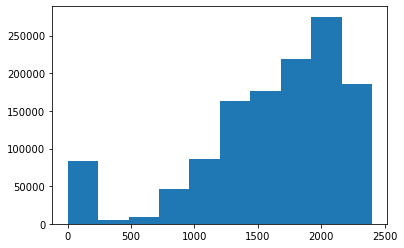

In [15]:
#Draw the histogram , said if this normal distribution or skewed distrbution 
plt.hist(df.ArrTime)

In [16]:
#This is skewed distrbution 

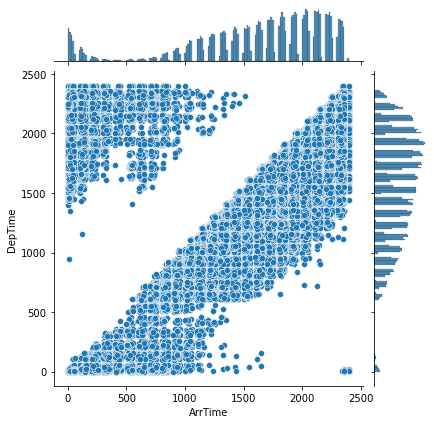

In [17]:
#To see if thier corrlation or not 
sns.jointplot(x="ArrTime",y="DepTime",data=df)

In [18]:
#Thier is a posstive corrlation

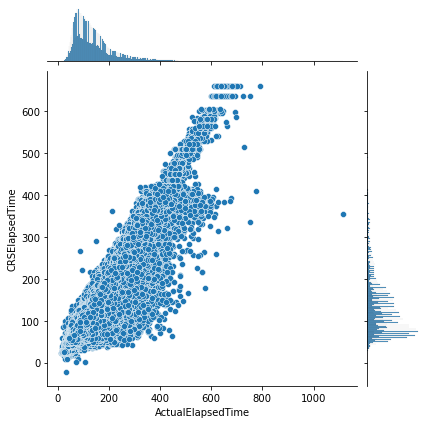

In [19]:
sns.jointplot(x="ActualElapsedTime",y="CRSElapsedTime",data=df)

In [20]:
#Thier is a posstive corrlation

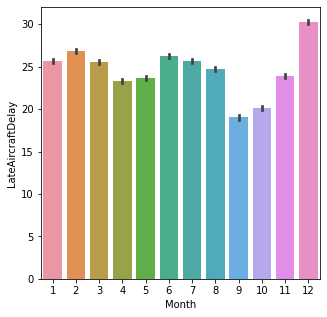

In [21]:
#To which month the LateAircraftDelay is more 
plt.figure(figsize = [5,5])
sns.barplot(x = 'Month', y = 'LateAircraftDelay' , data=df);

# Modeling

Split data 

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X=df[['DepTime','ArrTime','ActualElapsedTime','DepDelay','AirTime','ArrDelay',]]
y=df['SecurityDelay']

In [24]:
#df['CarrierDelay'].unique()

In [25]:
df['SecurityDelay'].value_counts()

0.0      1241481
7.0          350
6.0          327
8.0          286
9.0          278
          ...   
284.0          1
100.0          1
149.0          1
156.0          1
254.0          1
Name: SecurityDelay, Length: 156, dtype: int64

In [26]:
#X_train, X_test, y_train, y_test = train_test_split(df.drop('SecurityDelay', axis=1), df['SecurityDelay'], 
                                                 #   test_size = 0.33, random_state=42)

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42) # train test split 

In [28]:
from sklearn.preprocessing import StandardScaler
sct = StandardScaler()

In [29]:
X_train_sct = sct.fit_transform(X_train) # Transformation for feature sciling 
X_test_sct = sct.transform(X_test)

# Train and fit model 

In [32]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train_sct,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Calculate the accuracy

In [34]:
# Calculate the prediction
prediction = log.predict(X_test_sct)

In [35]:
# Calculate the score
log.score(X_train_sct, y_train) 

0.9951520372331197

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction) # We put y_test beacuse the model cant see 

0.9952510621345686

In [37]:
#They have same accuracy = balanced 

create report

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

In [39]:
print(classification_report(y_test,prediction));

C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classif

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    409718
         1.0       0.00      0.00      0.00        61
         2.0       0.00      0.00      0.00        58
         3.0       0.00      0.00      0.00        67
         4.0       0.00      0.00      0.00        77
         5.0       0.00      0.00      0.00        65
         6.0       0.00      0.00      0.00       106
         7.0       0.00      0.00      0.00       111
         8.0       0.00      0.00      0.00       103
         9.0       0.00      0.00      0.00        91
        10.0       0.00      0.00      0.00        87
        11.0       0.00      0.00      0.00        78
        12.0       0.00      0.00      0.00        64
        13.0       0.00      0.00      0.00        59
        14.0       0.00      0.00      0.00        57
        15.0       0.00      0.00      0.00        85
        16.0       0.00      0.00      0.00        58
        17.0       0.00    